In [132]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

np.random.seed(0)

In [133]:
# load data
df = pd.read_csv('data/df_genial.csv')
df = df.fillna(0)
df.head()

,year,district,number_planted_trees,number_unique_species,Formede træer,Gade- og allétræer,Park- og naturtræer,Private træer,Træer i bevoksninger,Gennemsnit for alle personer med indkomsten (kr.),avg_study_year
0,2008.0,Amager Vest,60,5,0.0,59.0,0.0,1.0,0.0,209245.0,13.152245
1,2008.0,Amager Øst,6,2,0.0,1.0,5.0,0.0,0.0,202575.0,13.077911
2,2008.0,Bispebjerg,17,2,0.0,17.0,0.0,0.0,0.0,190239.0,12.846948
3,2008.0,Brønshøj-Husum,101,2,0.0,101.0,0.0,0.0,0.0,203281.0,12.729431
4,2008.0,Indre By,33,4,5.0,28.0,0.0,0.0,0.0,258185.0,14.252449


In [134]:
def get_types(df):
    df['year'] = df['year'].astype(int)
    df['Formede træer'] = df['Formede træer'].astype(int)
    df['Gade- og allétræer'] = df['Gade- og allétræer'].astype(int)
    df['Park- og naturtræer'] = df['Park- og naturtræer'].astype(int)
    df['Private træer'] = df['Private træer'].astype(int)
    df['Træer i bevoksninger'] = df['Træer i bevoksninger'].astype(int)
    return df 
df = get_types(df)
df.dtypes

year                                                   int64
district                                              object
number_planted_trees                                   int64
number_unique_species                                  int64
Formede træer                                          int64
Gade- og allétræer                                     int64
Park- og naturtræer                                    int64
Private træer                                          int64
Træer i bevoksninger                                   int64
Gennemsnit for alle personer med indkomsten (kr.)    float64
avg_study_year                                       float64
dtype: object

In [135]:
df['year'] = df['year']-2008

number of bins:  12


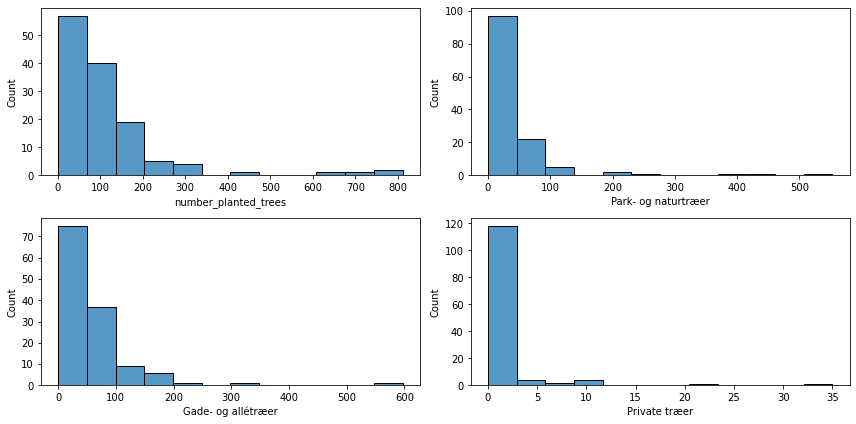

In [136]:
# Histogram of response variables - should be normal distributed for GLM
nbins = int(np.ceil(np.sqrt(df.shape[0])))
print('number of bins: ', nbins)
fig, axes = plt.subplots(2,2, figsize = (12,6))
sns.histplot(df['number_planted_trees'], bins=nbins, ax=axes[0,0])
sns.histplot(df['Park- og naturtræer'], bins=nbins, ax=axes[0,1])
sns.histplot(df['Gade- og allétræer'], bins=nbins, ax=axes[1,0])
sns.histplot(df['Private træer'], bins=nbins, ax=axes[1,1])
plt.tight_layout()
plt.show()

0.18278001343830103


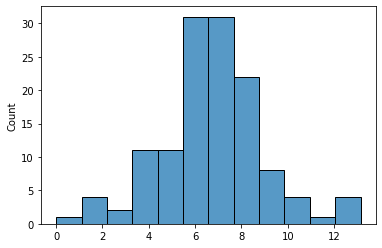

In [137]:
y_fitted, lambda_fitted = stats.boxcox(y)
print(lambda_fitted)
sns.histplot(y_fitted, bins = nbins)
plt.show()

In [144]:
# Modeling
df_model = df.drop(columns=['Formede træer','Gade- og allétræer','Park- og naturtræer','Private træer','Træer i bevoksninger'])
df_model = pd.get_dummies(df_model)

# OLS
X = sm.add_constant(df_model.drop(columns=['number_planted_trees','year']))
est = sm.OLS(y_fitted, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     15.37
Date:                Tue, 03 May 2022   Prob (F-statistic):           6.04e-19
Time:                        11:12:48   Log-Likelihood:                -226.32
No. Observations:                 130   AIC:                             478.6
Df Residuals:                     117   BIC:                             515.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [111]:
# Modeling
df = df.fillna(0)
df = pd.get_dummies(df)
X = df.drop(columns=['number_planted_trees','Formede træer','Gade- og allétræer','Park- og naturtræer','Private træer','Træer i bevoksninger'])
X_train, X_test, y_train, y_test = train_test_split(X,y_fitted, test_size=0.25)

In [112]:
# Linear Regression
linear_regression = LinearRegression().fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

MAE_linear_regression = mean_absolute_error(y_test, y_pred)
r2_linear_regression = r2_score(y_test, y_pred)
var_linear_regression = explained_variance_score(y_test, y_pred)
print("----------------------")
print("Linear Regression: ")
print("MAE ", MAE_linear_regression)
print("R2 ", r2_linear_regression)
print("Explained variance ", var_linear_regression)
print("----------------------")

----------------------
Linear Regression: 
MAE  1.3910321346367525
R2  0.5696271864783975
Explained variance  0.5696339866139608
----------------------


In [113]:
print('intercept: ', linear_regression.intercept_)
linear_regression.coef_
linear_regression.feature_names_in_
pd.DataFrame(linear_regression.feature_names_in_, linear_regression.coef_)


intercept:  -13.850407430812346


,0
-0.203692,year
0.230860,number_unique_species
-0.000007,Gennemsnit for alle personer med indkomsten (kr.)
1.488668,avg_study_year
0.722618,district_Amager Vest
0.029874,district_Amager Øst
0.926838,district_Bispebjerg
0.482591,district_Brønshøj-Husum
-0.946108,district_Indre By
-1.301133,district_Nørrebro
